<a href="https://colab.research.google.com/github/Bestakdv/vhs-intro-ai/blob/main/mnist_digit_recognition_yefimenko.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading dataset

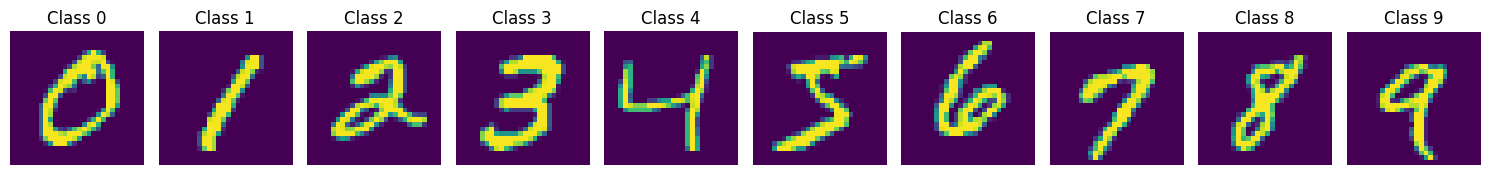

In [13]:
import keras
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

#Loads the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#Plots the data
fig, axes = plt.subplots(1, 10, figsize=(15, 4))
for i in range(10):
    axes[i].imshow(X_train[y_train == i][0])
    #Gets rid of the axis
    axes[i].axis('off')
    axes[i].set_title(f"Class {i}")
plt.tight_layout()
plt.show()

Gets the dataset, loads it and then plots the classes

In [14]:
from sklearn.model_selection import train_test_split

#Dividing by 255 to make it between [0,1] for white and black pixels
X_train = X_train / 255.0
X_test = X_test / 255.0

#Reshaping
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

#Splitting data using random_state as 42 to get same split of data every time
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42)

/255.0 to make pixel values between [0,1] and then train. Using random state 42 as after doing research you will get the same split of data every time compared to if you used a different random state

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8555 - loss: 0.4957 - val_accuracy: 0.9629 - val_loss: 0.1300
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9599 - loss: 0.1298 - val_accuracy: 0.9753 - val_loss: 0.0837
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9710 - loss: 0.0925 - val_accuracy: 0.9803 - val_loss: 0.0651
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9798 - loss: 0.0673 - val_accuracy: 0.9852 - val_loss: 0.0497
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9808 - loss: 0.0591 - val_accuracy: 0.9872 - val_loss: 0.0400
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9862 - loss: 0.0447 - val_accuracy: 0.9886 - val_loss: 0.0353
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9874 - loss: 0.0399 - val_accuracy: 0.9902 - val_loss: 0.0284
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9892 - loss: 0.0323 -

<Axes: title={'center': 'Accuracy'}>

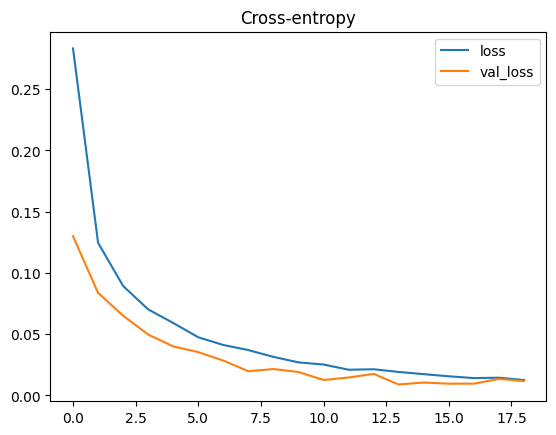

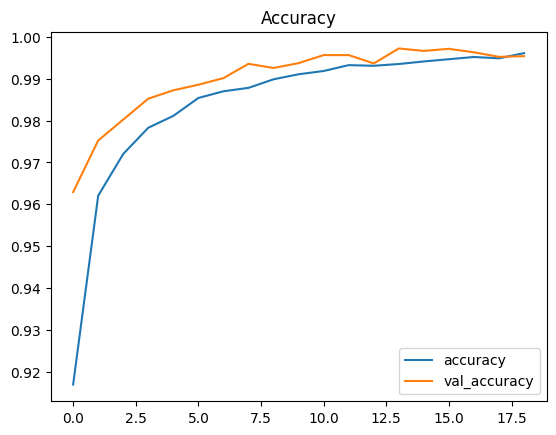

In [15]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

#One hot encode to get categorical_crossentropy to work
y_train_one_hot = to_categorical(y_train, num_classes=10)
y_val_one_hot = to_categorical(y_val_split, num_classes=10)

#Best model(results are at the very bottom of every trial)
model = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

"""
model = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
"""

#Defining optimizer
optimizer = Adam(learning_rate=0.001)

# Compile the model with the Adam optimizer
model.compile(
    optimizer=optimizer,
    loss="categorical_crossentropy",
    metrics=['accuracy']
)

# Best based on results
early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)

# Train the model
history = model.fit(
    X_train, y_train_one_hot,
    validation_data=(X_val_split, y_val_one_hot),
    batch_size=32,
    epochs=20,
    callbacks=[early_stopping],
)

# Plot the results
import pandas as pd
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy")

From 0 to 15 epoches the model is underfit and at aroun the end at 20 epoches it becomes slightly overfit

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


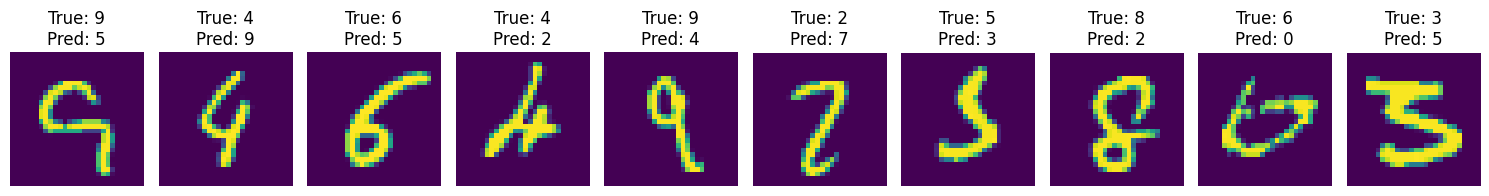

In [16]:
import numpy as np

# Get predictions
predictions = model.predict(X_test)
#Find the predicted classes
predicted_classes = np.argmax(predictions, axis=1)
#One hot encode and then get the true classes
true_classes = np.argmax(to_categorical(y_test, num_classes=10), axis=1)
#Finds the indicies where test images were classified wrong
misclassified_indices = np.where(predicted_classes != true_classes)[0]

#Plots the missclassified images
fig, axes = plt.subplots(1, 10, figsize=(15, 4))
#goes through all the missclassified images
for i, x in enumerate(misclassified_indices[:10]):
    axes[i].imshow(X_test[x].reshape(28, 28))
    #Gets rid of the axis
    axes[i].axis('off')
    axes[i].set_title(f"True: {true_classes[x]}\nPred: {predicted_classes[x]}")
plt.tight_layout()
plt.show()


Outputs 10 of the wrongly classified numbers (I tried to do all but it kept crashing)


**Epoches (first is accuracy 2nd number is val_accuracy):**

3: .9769, .9984

5: .9867, .9894

7: .9922, .9934

10: .9951, .9966

11: .9964, .9942

12: .9965, .9961

13: .9972, .9988

14: .9964,.9956

20: .9982, .9975


**Batch Size:**

32: .9982, .9975

64: .9972, .9976

128: .9954, .9976


**Optimizer:**

adam: .9982, .9975

sgd: .9612, .9641


**Units: (Total)**

128: .9982, .9975

192(w/ dropout): 0.9569, 0.9869

256: 0.9835, 0.9869




**patience**

3: .9959, .995

5: .9982, .9975

**Learning Rate**

0.001: 0.9982, 0.9975

0.05: 0.757, 0.747

